### Load the Auto dataset and create a binary outcome variable

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)
df['muscle'] = df['horsepower'].apply(lambda x: 0 if x < np.mean(df['horsepower']) else 1)

# Stratification
df = df.sort_values('muscle')
df['fold'] = np.arange(len(df)) % 5

train = df[df['fold'] != 2]
test = df[df['fold'] == 2]

### Fit a Logistic Regression model

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train[['weight', 'year', 'displacement', 'cylinders']], train['muscle'])
test_predictions = model.predict_proba(test[['weight', 'year', 'displacement', 'cylinders']])

### Calculate some performance metrics

In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score

accuracy_score(test['muscle'], np.round(test_predictions[:,1]).astype(int))
precision_score(test['muscle'], np.round(test_predictions[:,1]).astype(int))
confusion_matrix(test['muscle'], np.round(test_predictions[:,1]).astype(int)) / len(test['muscle'])

array([[0.6025641 , 0.02564103],
       [0.08974359, 0.28205128]])

In [8]:
np.asarray([0.99]).astype(int)

array([0])

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test['muscle'], test_predictions[:,1])

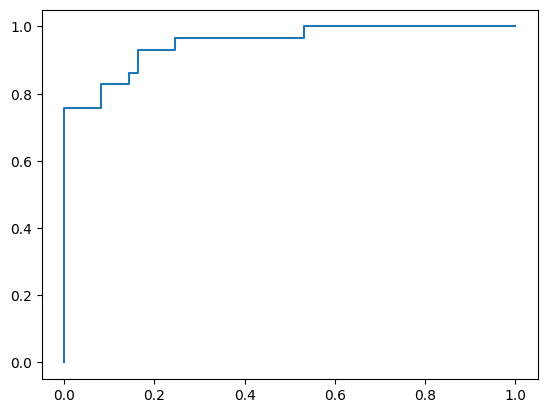

In [19]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)